In [154]:
import pandas as pd
import matplotlib.pyplot as plt 

In [155]:
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [156]:
df=df.drop(columns=df.columns[0],axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [157]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

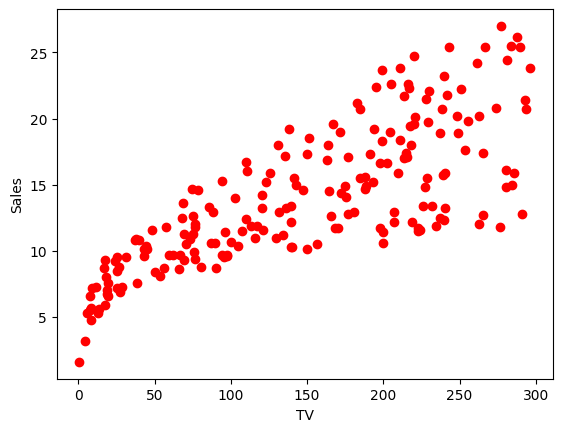

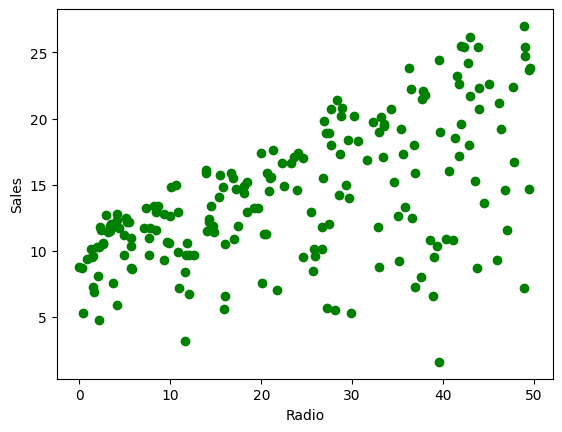

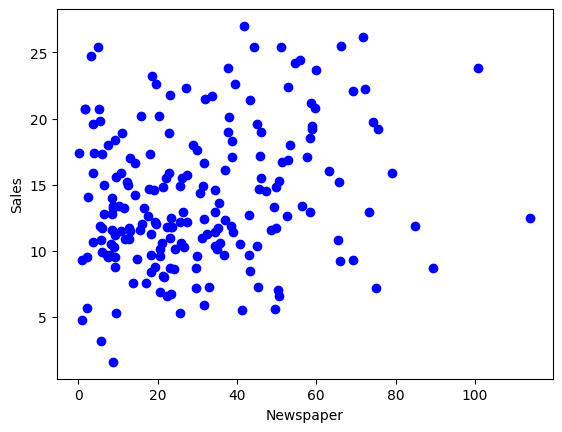

In [158]:
plt.scatter(df['TV'], df['Sales'], c='r')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

plt.scatter(df['Radio'],df['Sales'],c='g')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

plt.scatter(df['Newspaper'],df['Sales'],c='b')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

In [159]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts

In [160]:

# the following code basically adds more points on the plot (line)
# so that the model learns the 'regression line' more accurately
df['TV_sq'] = df['TV']**2
df['Radio_sq'] = df['Radio']**2

# basically this line will help us see if the combination of TV and
# Radio advertising has a bigger effect on sales than just TV or Radio advertising alone.
df['TV_Radio'] = df['TV'] * df['Radio']

# Create the feature matrix with the original features, polynomial terms, and interaction terms
x = df[['TV', 'Radio', 'Newspaper', 'TV_sq', 'Radio_sq', 'TV_Radio']]
x

,TV,Radio,Newspaper,TV_sq,Radio_sq,TV_Radio
0,230.1,37.8,69.2,52946.01,1428.84,8697.78
1,44.5,39.3,45.1,1980.25,1544.49,1748.85
2,17.2,45.9,69.3,295.84,2106.81,789.48
3,151.5,41.3,58.5,22952.25,1705.69,6256.95
4,180.8,10.8,58.4,32688.64,116.64,1952.64
...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,13.69,141.34
196,94.2,4.9,8.1,8873.64,24.01,461.58
197,177.0,9.3,6.4,31329.00,86.49,1646.10
198,283.6,42.0,66.2,80428.96,1764.00,11911.20


In [161]:
y = df[['Sales']].values
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [162]:
# x=df.iloc[:,:-1].values
# y=df.iloc[:,-1].values


x = df.drop('Sales', axis=1)
y = df['Sales']
x,y

(        TV  Radio  Newspaper     TV_sq  Radio_sq  TV_Radio
 0    230.1   37.8       69.2  52946.01   1428.84   8697.78
 1     44.5   39.3       45.1   1980.25   1544.49   1748.85
 2     17.2   45.9       69.3    295.84   2106.81    789.48
 3    151.5   41.3       58.5  22952.25   1705.69   6256.95
 4    180.8   10.8       58.4  32688.64    116.64   1952.64
 ..     ...    ...        ...       ...       ...       ...
 195   38.2    3.7       13.8   1459.24     13.69    141.34
 196   94.2    4.9        8.1   8873.64     24.01    461.58
 197  177.0    9.3        6.4  31329.00     86.49   1646.10
 198  283.6   42.0       66.2  80428.96   1764.00  11911.20
 199  232.1    8.6        8.7  53870.41     73.96   1996.06
 
 [200 rows x 6 columns],
 0      22.1
 1      10.4
 2       9.3
 3      18.5
 4      12.9
        ... 
 195     7.6
 196     9.7
 197    12.8
 198    25.5
 199    13.4
 Name: Sales, Length: 200, dtype: float64)

In [163]:
x_train,x_test,y_train,y_test=tts(x,y,random_state=63,test_size=0.3)

In [164]:
model=LR()
model.fit(x_train,y_train)

LinearRegression()

In [165]:
y_pred=model.predict(x_test)
y_pred,y_test


(array([ 7.07093322, 15.77371788, 10.2236594 , 10.11310667, 14.06366958,
        16.6566412 , 19.33196284, 19.43929424, 15.69763698, 14.88524465,
        17.36418703,  8.59560683, 17.14996901,  9.08958221, 15.03640172,
        18.99533868, 13.88533023, 22.21317813, 22.77354298, 10.80921636,
        16.1834676 , 10.40958266,  8.26084162, 12.0901225 , 13.46314381,
        25.21166567, 10.48998544, 12.29992641, 17.43121422, 19.23177147,
        10.32159868, 14.6601042 ,  7.11502168, 12.71000111, 18.57895556,
        22.31526209, 18.65766693, 11.47232085,  8.36583479, 12.28940343,
        11.58315206, 11.59210624,  9.49831001,  5.75328955, 11.14200671,
         8.97559594, 13.19373824,  8.32172159, 11.36272461,  6.62562332,
         9.08646237,  8.1675796 , 10.76981392, 20.15551509, 20.19029161,
        14.80070006, 19.64996915,  8.43457031,  9.88708324, 11.8654274 ]),
 126     6.6
 154    15.6
 125    10.6
 143    10.4
 112    14.1
 89     16.7
 153    19.0
 193    19.6
 97     15.5
 103 

In [166]:
from sklearn.metrics import mean_squared_error as mse
mse_score=mse(y_test,y_pred)
mse_score

0.1979161624130342